Loading the libraries

In [1]:
install.packages(c("ggplot2", "devtools", "dplyr", "stringr"),repos="http://cran.us.r-project.org/")
install.packages(("randomForest"),repos="http://cran.us.r-project.org/")

package 'ggplot2' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vivek\AppData\Local\Temp\RtmpuWLLqQ\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vivek\AppData\Local\Temp\RtmpuWLLqQ\downloaded_packages


In [2]:
train <- read.csv("titanic-selected/train.csv", header=TRUE)
test <- read.csv("titanic-selected/test.csv", header=TRUE)

In [3]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


The variable Survived uses ‘0’ for ‘No’ and ‘1’ for ‘Yes’. To avoid confusion, the code will be replaced by factors.

In [4]:
train <- within(train, Survived <- factor(Survived, labels = c("No", "Yes")))

Factoring Pclass of train and test data

In [5]:
train <- within(train, Pclass <- factor(Pclass))
test <- within(test, Pclass <- factor(Pclass))

In [6]:
levels(train$Pclass)
levels(test$Pclass)

[1] "1" "2" "3"

[1] "1" "2" "3"

In [7]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [8]:
train <- within(train, Pclass <- factor(Pclass))
test <- within(test, Pclass <- factor(Pclass))

Load the required library for plotting data

In [9]:
library(ggplot2)

Since survived and Pclass columns are factor, they can easily be plotted

The qplot() function can be used to create the most common graph types.<br/>
<b>Format : qplot(x, y, data=, color=, shape=, size=, alpha=, geom=, method=, formula=, facets=, xlim=, ylim= xlab=, ylab=, main=, sub=) 



description:
<b>alpha</b><br/>
Alpha transparency for overlapping elements expressed as a fraction between 0 (complete transparency) and 1 (complete opacity)
<br/><b>color, shape, size, fill</b><br/>
Associates the levels of variable with symbol color, shape, or size. For line plots, color associates levels of a variable with line color. For density and box plots, fill associates fill colors with a variable. Legends are drawn automatically.
<br/><b>data</b><br/>
Specifies a data frame
<br/><b>facets</b><br/>
Creates a trellis graph by specifying conditioning variables. Its value is expressed as rowvar ~ colvar. To create trellis graphs based on a single conditioning variable, use rowvar~. or .~colvar)
<br/><b>geom</b><br/>
Specifies the geometric objects that define the graph type. The geom option is expressed as a character vector with one or more entries. geom values include "point", "smooth", "boxplot", "line", "histogram", "density", "bar", and "jitter". 
<br/><b>main, sub</b><br/></b><br/>
Character vectors specifying the title and subtitle
<br/><b>method, formula</b><br/>
If geom="smooth", a loess fit line and confidence limits are added by default. When the number of observations is greater than 1,000, a more efficient smoothing algorithm is employed. Methods include "lm" for regression, "gam" for generalized additive models, and "rlm" for robust regression. The formula parameter gives the form of the fit. 
<br/>
<br/>For example, to add simple linear regression lines, you'd specify geom="smooth", method="lm", formula=y~x. Changing the formula to y~poly(x,2) would produce a quadratic fit. Note that the formula uses the letters x and y, not the names of the variables. 
<br/>
For method="gam", be sure to load the mgcv package. For method="rml", load the MASS package. 
<br/><b>x, y</b><br/>
Specifies the variables placed on the horizontal and vertical axis. For univariate plots (for example, histograms), omit y
<br/><b>xlab, ylab</b><br/>
Character vectors specifying horizontal and vertical axis labels
<b><b>xlim,ylim</b><br/>
Two-element numeric vectors giving the minimum and maximum values for the horizontal and vertical axes, respectively

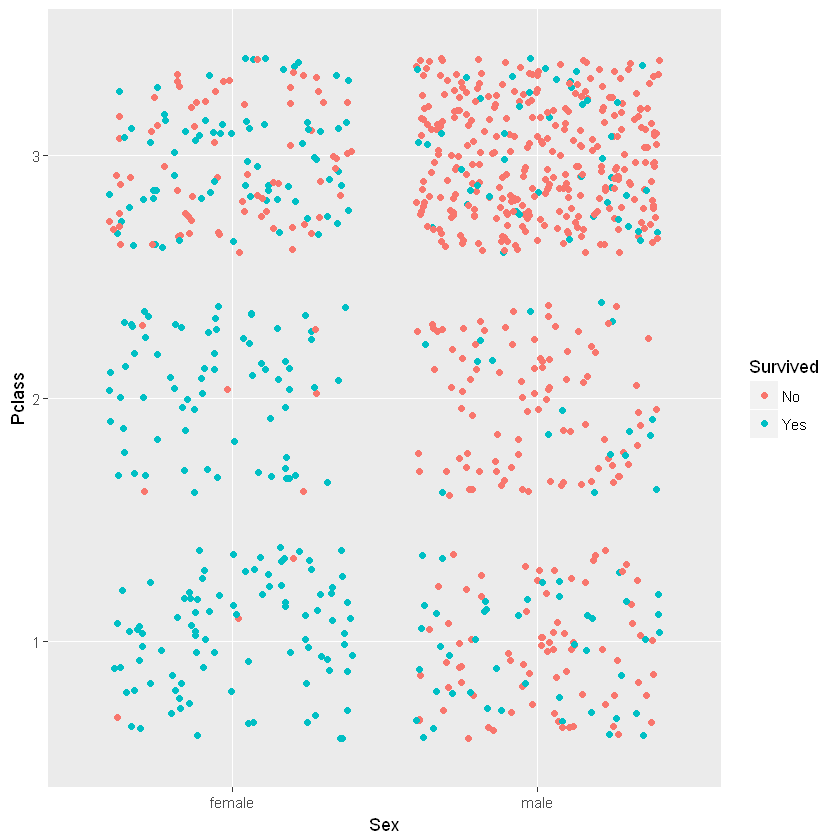

In [10]:

qplot(Sex, Pclass, colour = Survived, data=train, geom="jitter")


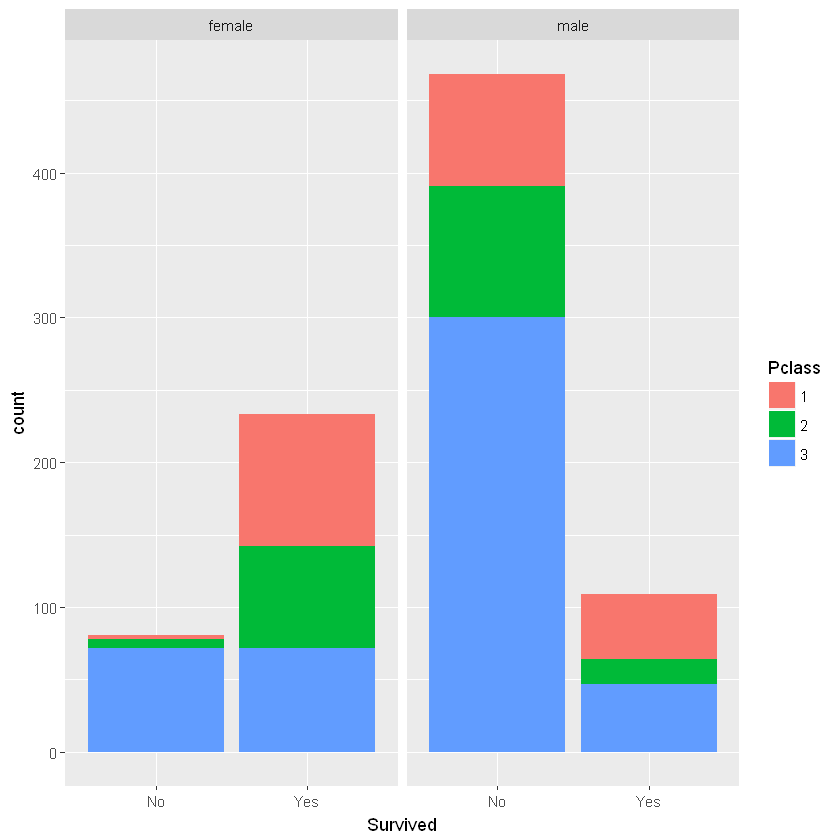

In [11]:
qplot(Survived, data=train, geom="bar", facets = . ~ Sex, fill=Pclass)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


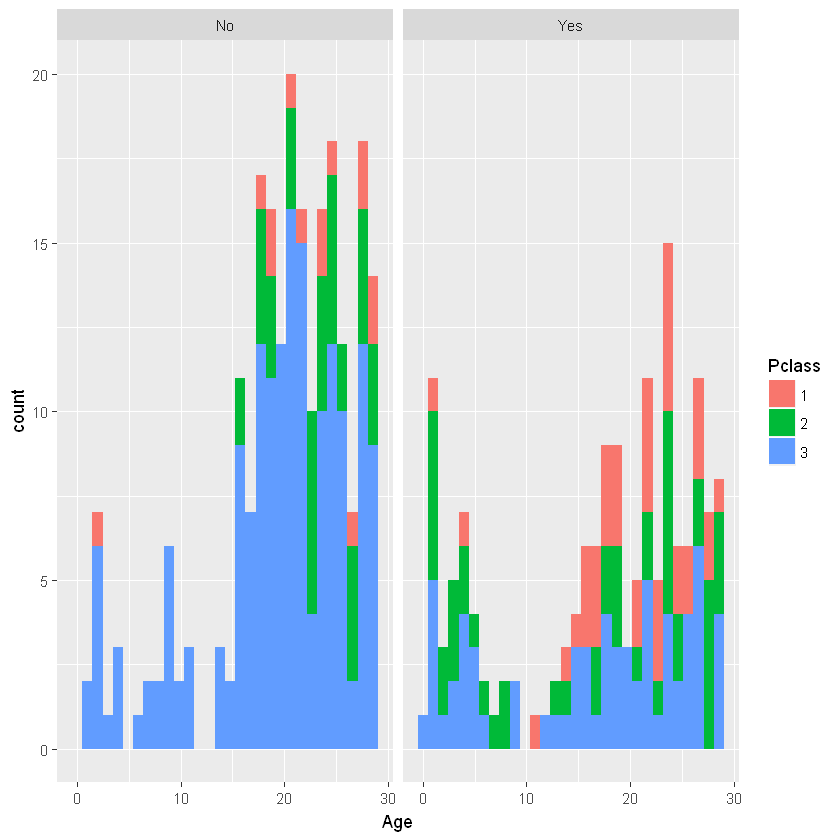

In [12]:
library(dplyr)
qplot(Age, data=filter(train,Age<30), geom="histogram", facets = . ~ Survived, fill=Pclass)

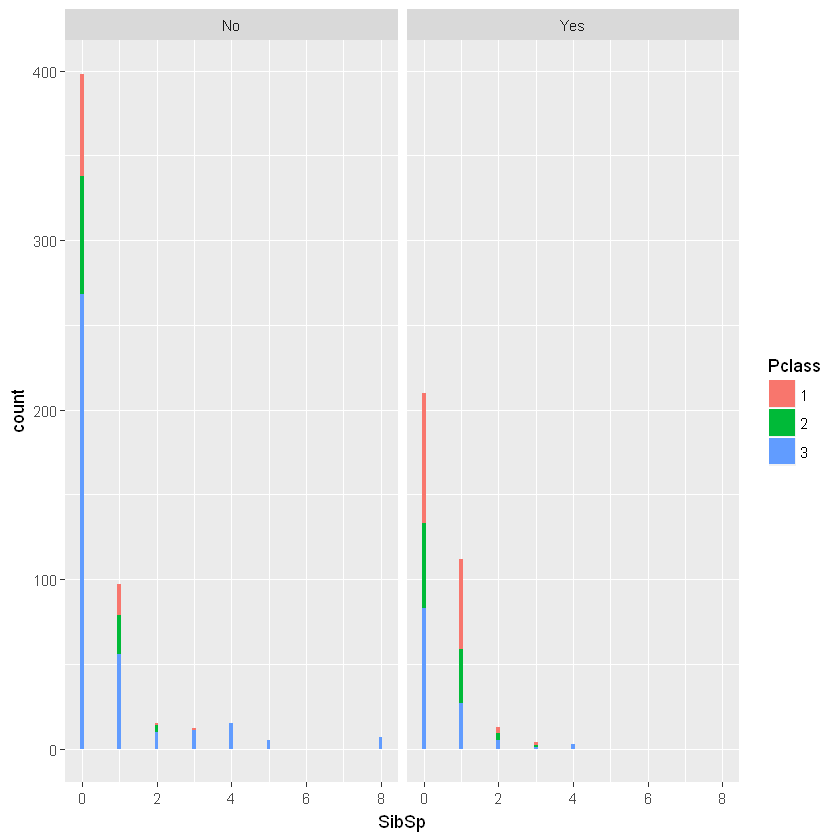

In [13]:
ggplot(train, aes(SibSp, fill = Pclass),) +geom_histogram(binwidth = 0.1)+facet_grid(. ~ Survived)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


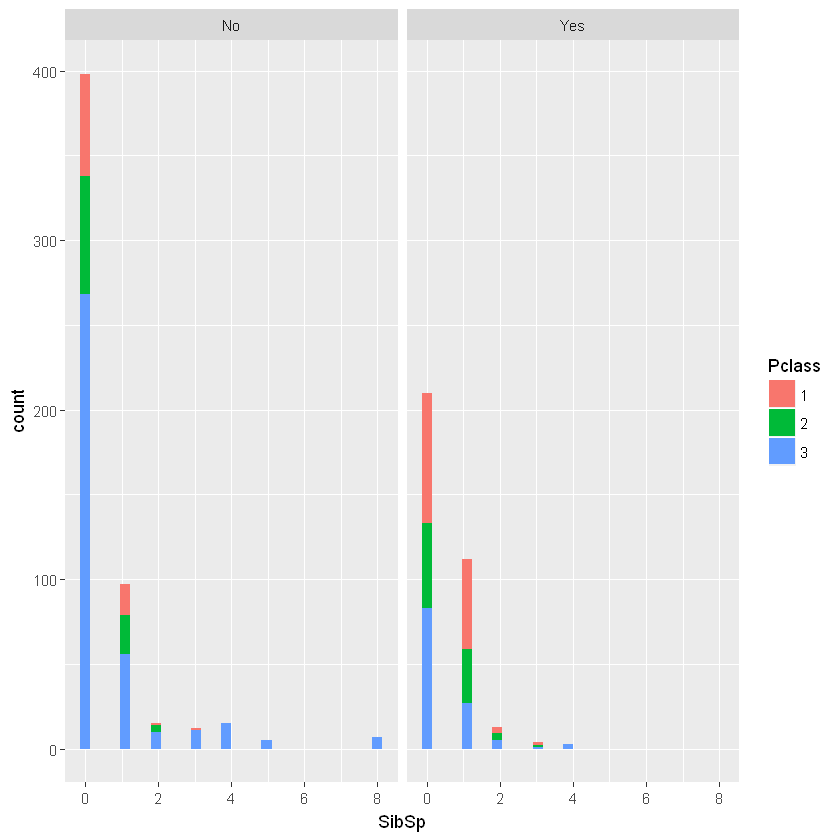

In [14]:
qplot(SibSp, data=filter(train,SibSp<9), geom="histogram", facets = . ~ Survived, fill=Pclass)

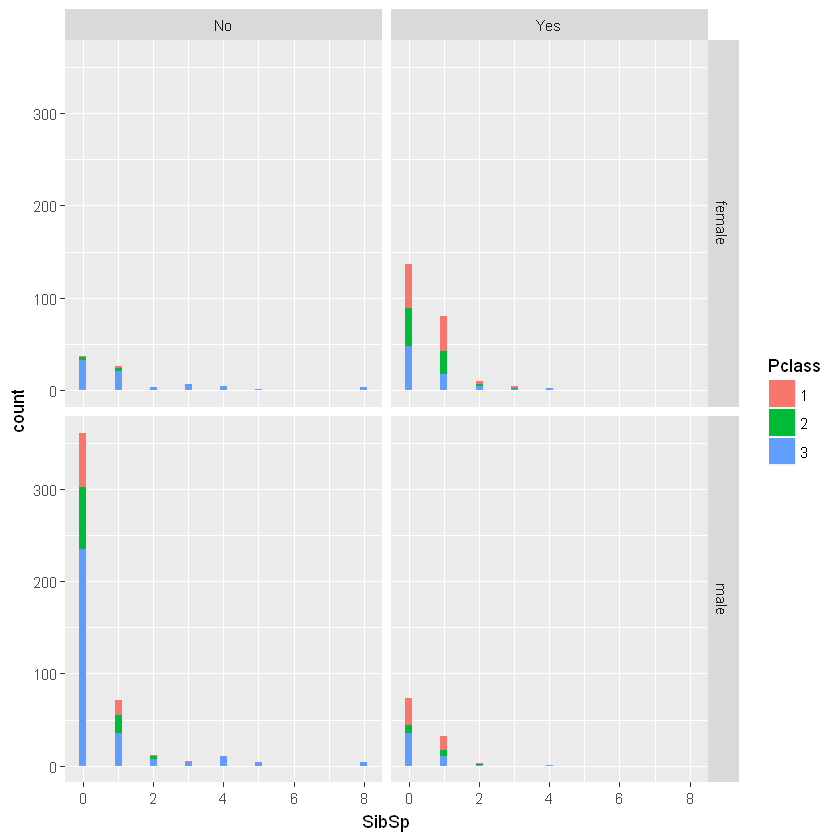

In [15]:
ggplot(train, aes(SibSp, fill = Pclass),) +geom_histogram(binwidth = 0.2)+facet_grid(Sex ~ Survived)

Fitting a model based on radom forest.<br/>
Random Forest is more of a machine learning model consisting of multiple ML models. It applies its logic to produce several decision trees and produces output based on voting.
<br/>
https://www.bing.com/videos/search?q=Random+Forest+Classification&&view=detail&mid=50F15F07814F22D23F5D50F15F07814F22D23F5D&FORM=VRDGAR

<br/>
Here, we are first fitting the model based on 2 variables only. In layman terms, we can say -> make a model that can predict whether a person will survive or not based on 2 variables, i.e. Pclass and Sex, using the data in "train" dataset. <br/>
Next we tell it to predict the model on test data set.<br/>
We can also make the model based on multiple variables.

In [16]:
library("randomForest")
fit <- randomForest(Survived ~Pclass + Sex, data=train)
prediction.1 <- predict(fit, test)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



Below I add the predicted result to the test dataframe

In [22]:
predictionList=data.frame(test, Survival_Prediction=prediction.1)

In [23]:
head(predictionList)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Prediction
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,No
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,Yes
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,No
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,No
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,Yes
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,No


Analysing the data pased on prediction made by the model1.


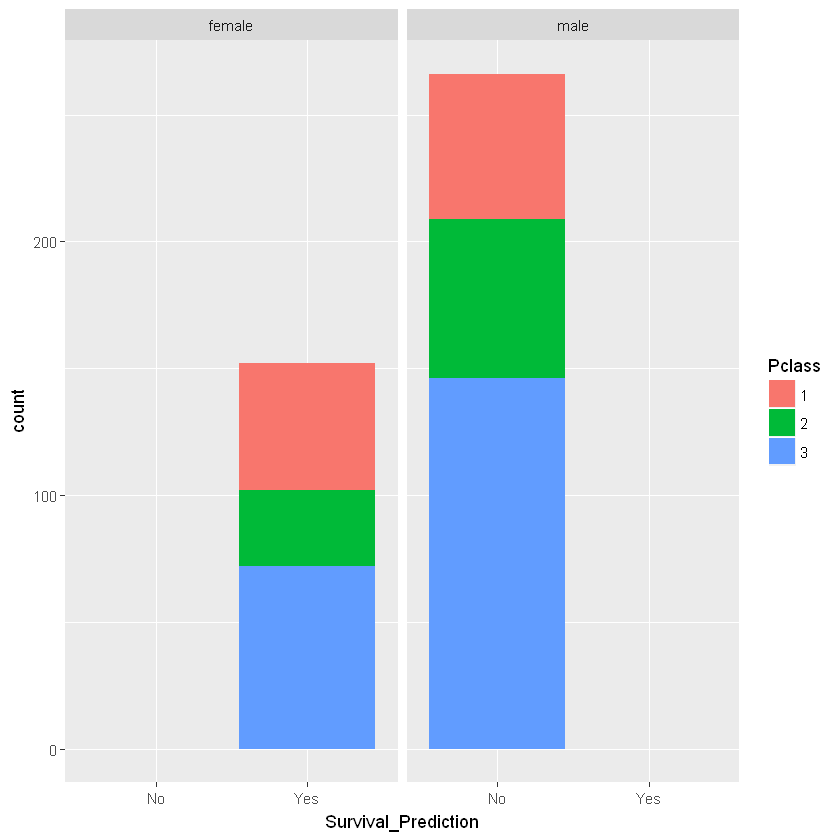

In [25]:
qplot(Survival_Prediction, data=predictionList, geom="bar", facets = . ~ Sex, fill=Pclass)

Next we make another model based on few more variables


In [26]:
fit <- randomForest(Survived ~Pclass + Sex + SibSp + Parch, data=train)
prediction.2 <- predict(fit, test)

Analysing the data pased on prediction made by the model1.

In [28]:
predictionList2=data.frame(test, Survival_Prediction=prediction.2)

In [29]:
head(predictionList2)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Prediction
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,No
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,Yes
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,No
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,No
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,Yes
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,No


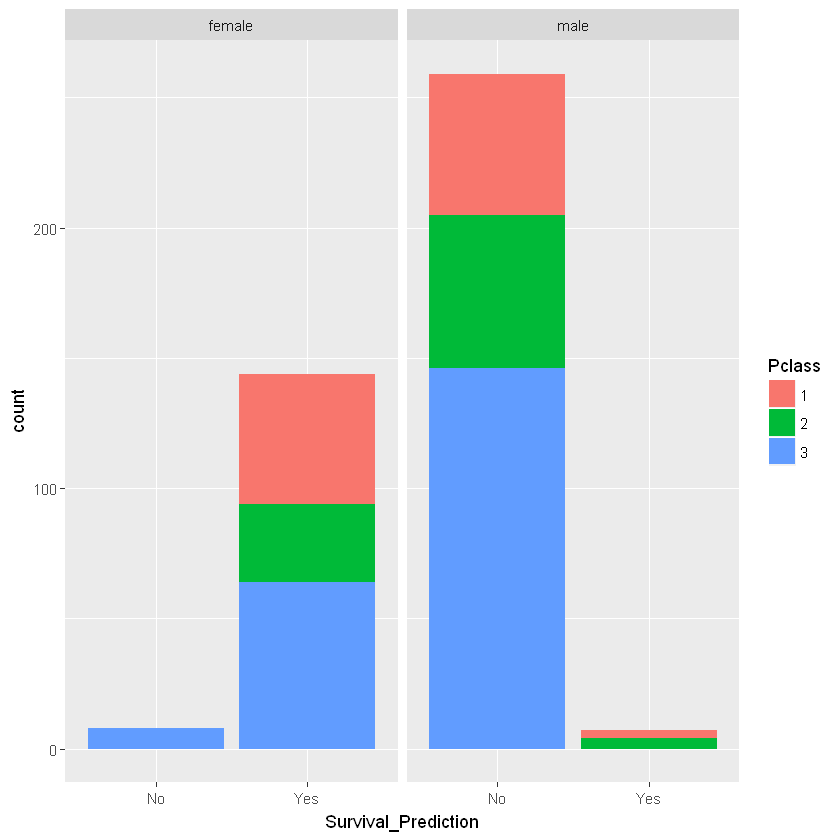

In [30]:
qplot(Survival_Prediction, data=predictionList2, geom="bar", facets = . ~ Sex, fill=Pclass)

Saving the data to CSV files

In [31]:
result <- data.frame(test$PassengerId, prediction.1)
names(result)<-c("PassengerId","Survived")
write.csv(result, "prediction1.csv",row.names=FALSE)

In [32]:
result <- data.frame(test$PassengerId, prediction.2)
names(result)<-c("PassengerId","Survived")
write.csv(result, "prediction2.csv",row.names=FALSE)